### Joseph Bu <br />
### github: @josephhbu <br />
### USC ID: 3752428485
---

## HW 2 <br />

### 1. Combined Cycle Power Plant Data Set <br />

The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant.

(a)
Download the Combined Cycle Power Plant data from:
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [248]:
column_names = [
    "T", 
    "V", 
    "AP", 
    "RH", 
    "EP"
]
data = pd.read_excel('CCPP/Folds5x2_pp.xlsx', sheet_name=0, names=column_names)
data

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


(b) Exploring the data: <br />

i. How many rows are in this data set? How many columns? What do the rows
and columns represent?

In [249]:
num_rows, num_cols = data.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")
print("The rows represent the average hourly ambient feature observations for all features and the columns represent all the observations for that feature column.")

The dataset has 9568 rows and 5 columns.
The rows represent the average hourly ambient feature observations for all features and the columns represent all the observations for that feature column.


ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

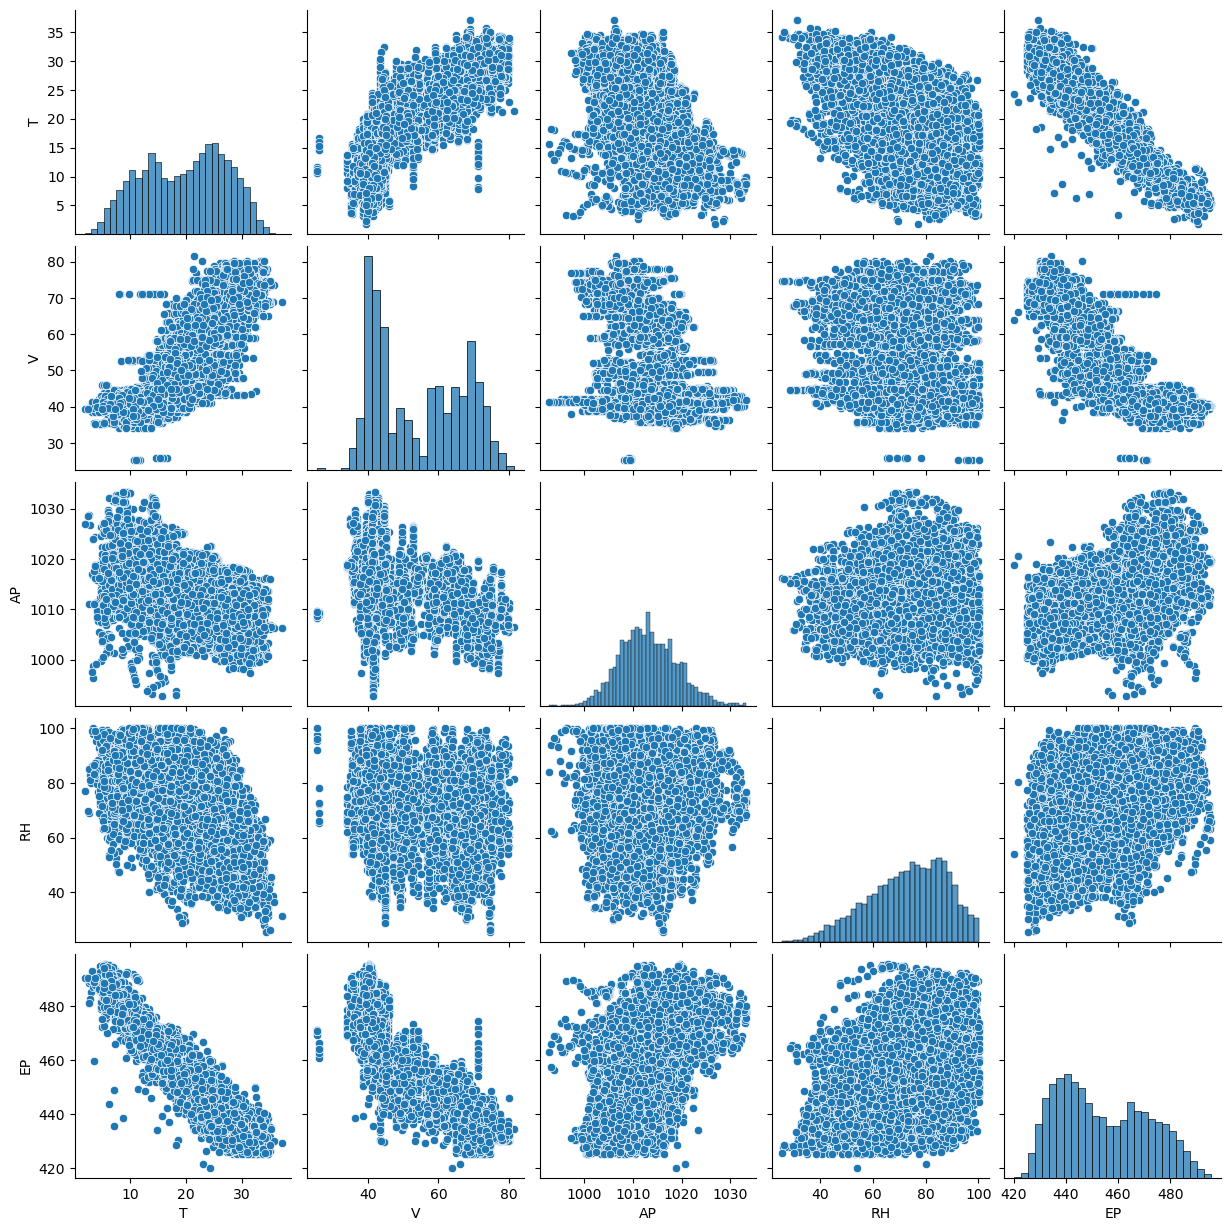

The linear relationship between T and EP as well as V and EP look to be pretty strong. However AP and RH both don't have as strong a linear relationship with EP.
Both temperature T as well as V both have  a relatively linear relationship with all other variables. Rh looks to have the least linear of relationships with other variables.


In [250]:
sns.pairplot(data, vars=['T', 'V', 'AP', 'RH', 'EP'])
plt.show()
print("The linear relationship between T and EP as well as V and EP look to be pretty strong. However AP and RH both don't have as strong a linear relationship with EP.")
print("Both temperature T as well as V both have  a relatively linear relationship with all other variables. Rh looks to have the least linear of relationships with other variables.")

iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [251]:
summary_stats = {}
for col in ['T', 'V', 'AP', 'RH', 'EP']:
    mean = data[col].mean()
    median = data[col].median()
    range_stat = (data[col].max() - data[col].min())
    first_quart = data[col].quantile(0.25)
    third_quart = data[col].quantile(0.75)
    iqr = third_quart - first_quart

    summary_stats[col] = {
        "Mean": mean,
        "Median": median,
        "Range": range_stat,
        "First Quartile": first_quart,
        "Third Quartile": third_quart,
        "IQR": iqr
    }
summary = pd.DataFrame(summary_stats)
summary

,T,V,AP,RH,EP
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
First Quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
Third Quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

Simple Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:17:05   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0

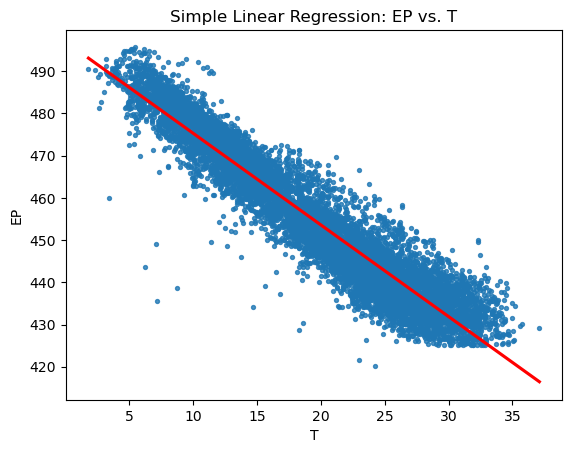

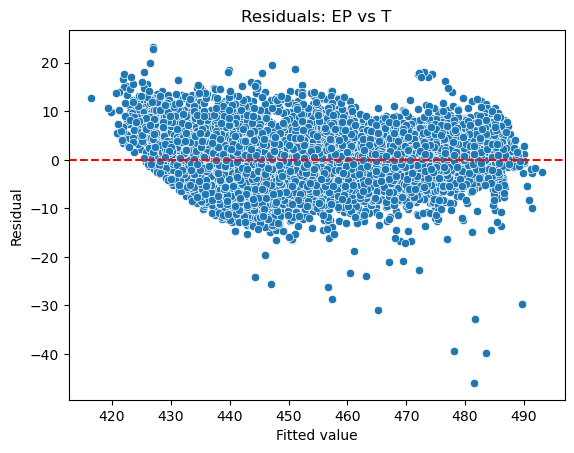

Simple Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:17:06   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8

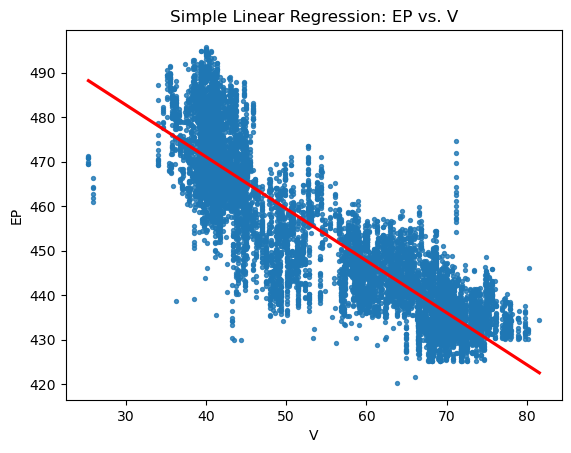

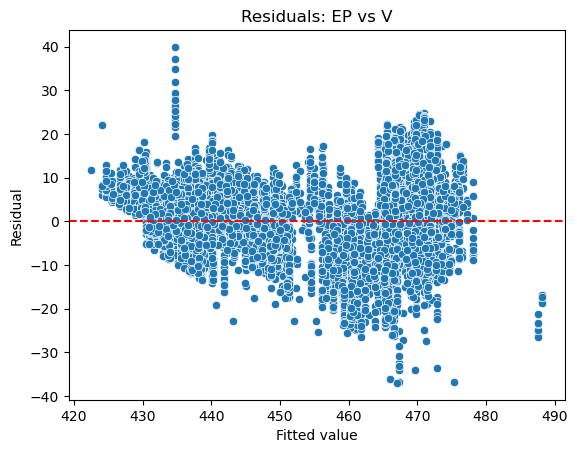

Simple Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:17:07   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2

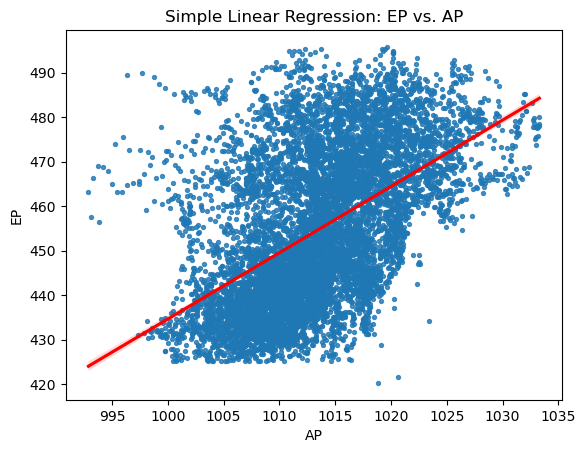

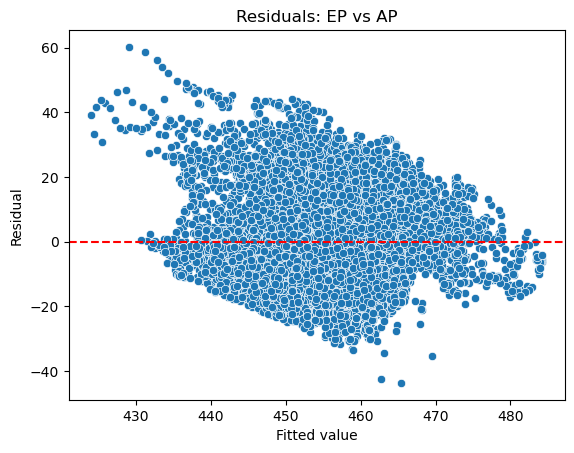

Simple Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:17:08   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9

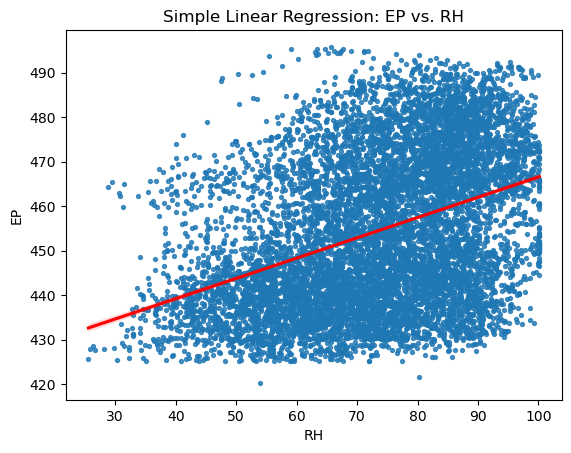

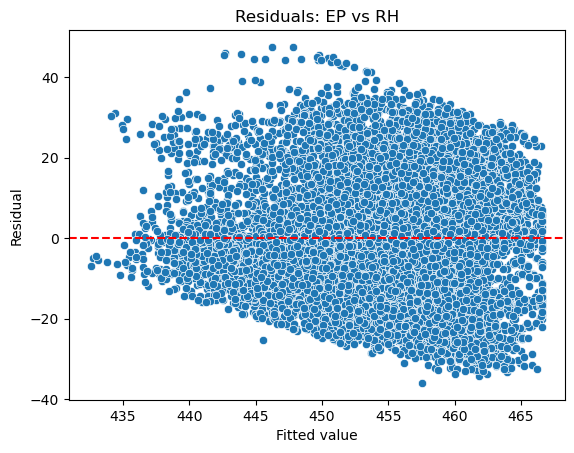

In [252]:
predictors = ['T', 'V', 'AP', 'RH']
response = 'EP'
univariate_coeff = []

for predictor in predictors:
    x = data[predictor]
    y = data[response]

    x_const = sm.add_constant(x)
    model = sm.OLS(y, x_const)
    results = model.fit()

    # Univariate regression coefficients for 1e)
    #univariate_coeff[predictor] = results.params[predictor]
    univariate_coeff.append(results.params[predictor])

    print("Simple Linear Regression Summary:")
    print(results.summary())

    sns.regplot(x=predictor, y=response, data=data, line_kws={'color': 'red'}, scatter_kws={'s':8})
    plt.title(f"Simple Linear Regression: {response} vs. {predictor}")
    plt.show()

    sns.scatterplot(x=results.fittedvalues, y=results.resid)
    plt.axhline(0, color='red', ls='--')
    plt.title(f"Residuals: {response} vs {predictor}")
    plt.xlabel('Fitted value')
    plt.ylabel('Residual')
    plt.show()

**Answer:**

**The p-value in all the predictors or features is equal to 0 which means p < 0.05. So in all of the models, there is a statistically significant association.
From the plots, it looks like there are quite a few outliers for each predictor that could be affecting the regression line.**

(d)
Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0:βj = 0?


In [253]:
x_mr= data[predictors]
x_mr_const = sm.add_constant(x_mr)  
model_mr= sm.OLS(data[response], x_mr_const)
mr_result = model_mr.fit()

# Multiple regression coefficients for 1e)
mr_coeff = []
for predictor in predictors:
    mr_coeff.append(mr_result.params[predictor])
    #mr_coeff = mr_coeff[predictor] = mr_result.params[predictor]

print("Multiple Regression Summary:")
print(mr_result.summary())

Multiple Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:17:09   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093  

**Answer:**

**From the multiple regression model, we can see that for all predictors we can reject the null hypothesis, as all the p-values = 0 < 0.05. This means they are all statistically significant.**

(e)
How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

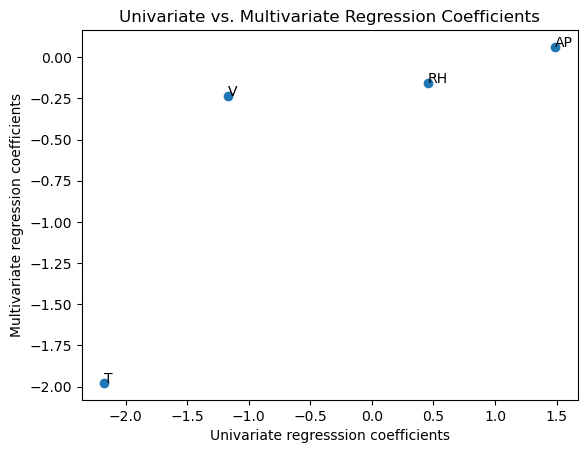

In [254]:
plt.scatter(x=univariate_coeff, y=mr_coeff)
for i, predictor in enumerate(predictors):
    plt.text(univariate_coeff[i], mr_coeff[i], predictor)
plt.xlabel("Univariate regresssion coefficients")
plt.ylabel("Multivariate regression coefficients")
plt.title("Univariate vs. Multivariate Regression Coefficients")
plt.show()

(f) Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form 
$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon 
$$

In [255]:
for predictor in predictors:
    x = data[[predictor]]
    y = data[response]

    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x)

    x_poly_const = sm.add_constant(x_poly)
    model_poly = sm.OLS(y, x_poly_const)
    result = model_poly.fit()

    print("Polynomial Model Summary:")
    print(result.summary())

Polynomial Model Summary:
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:17:09   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281     

**Answer:**

**Based on the model, for all of the predictors, the p-value for the coefficient of the cubic term is < 0.05. This means for all predictors, there is evidence of nonlinear association.**

(g)
Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [256]:
x = data[predictors]
y = data[response]
poly = PolynomialFeatures(interaction_only=True)
x_interact = poly.fit_transform(x)
feature_names = poly.get_feature_names_out(predictors)
x_interact_df = pd.DataFrame(x_interact, columns=feature_names, index=x.index)

x_interact_df_const = sm.add_constant(x_interact_df)
model_interact = sm.OLS(y, x_interact_df_const)
result = model_interact.fit()

print("Interaction Full Linear Regression Summary:")
print(result.summary())

feature_names = poly.get_feature_names_out()
print("")
print(f"Feature Interactions: {feature_names}")

test_error_model_dict = {}

Interaction Full Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:17:09   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1       

**Answer:**

**We can see that the p-values of**

- $T \cdot V = 0.000$
- $T \cdot RH = 0.00$
- $V \cdot AP = 0.00$
- $AP \cdot RH = 0.034$

**are all less than the significance level of 0.05, so that means these interaction terms are the only ones that are statistically significant**


(h)
Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [257]:
train_df, test_df = train_test_split(data, test_size=0.3)
X_train = train_df[predictors]
y_train = train_df[response]
X_test = test_df[predictors]
y_test = test_df[response]

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const)
result = model.fit()
y_train_pred = result.predict(X_train_const)
y_test_pred = result.predict(X_test_const)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print('MSE of Linear Regression Model without interactions')
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

test_error_model_dict['Linear Regression without interactions'] = test_mse


MSE of Linear Regression Model without interactions
Train MSE: 20.81143292538865
Test MSE: 20.681344822610523


In [258]:
# Model with interaction before removing insignificant values
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(train_df[predictors])
feature_names = poly.get_feature_names_out(predictors)

X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names, index=train_df.index)
X_train_poly_df_const = sm.add_constant(X_train_poly_df)

X_test_poly = poly.transform(X_test)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=feature_names, index=test_df.index)
X_test_poly_df_const = sm.add_constant(X_test_poly_df)

model_poly = sm.OLS(y_train, X_train_poly_df_const)
result_poly = model_poly.fit()
print(result_poly.summary())



                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7310.
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:17:10   Log-Likelihood:                -19187.
No. Observations:                6697   AIC:                         3.840e+04
Df Residuals:                    6682   BIC:                         3.851e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1          -7025.2551   1470.091     -4.779      0.0

In [259]:
# Removing insignificant values
def eliminate_insig_values(x, y, significance_level=0.05):
    while True:
        model = sm.OLS(y, x).fit()
        pvalues = model.pvalues.drop('1')

        max_pval = pvalues.max()
        if max_pval > significance_level:
            col_to_remove = pvalues.idxmax()
            x = x.drop(columns=[col_to_remove])
        else:
            break
    return x, model

In [260]:
X_train_poly_sig, model_poly_sig = eliminate_insig_values(X_train_poly_df_const, y_train)
X_test_poly_sig = X_test_poly_df_const[X_train_poly_sig.columns]

y_train_pred_poly = model_poly_sig.predict(X_train_poly_sig)
y_test_pred_poly = model_poly_sig.predict(X_test_poly_sig)

train_mse_poly = mean_squared_error(y_train, y_train_pred_poly)
test_mse_poly = mean_squared_error(y_test, y_test_pred_poly)

print('MSE of Model with Interaction and Quadratic Nonlinearities')
print(f"Train MSE: {train_mse_poly}")
print(f"Test MSE: {test_mse_poly}")

test_error_model_dict['Linear Regression with interactions'] = test_mse_poly

MSE of Model with Interaction and Quadratic Nonlinearities
Train MSE: 18.037227767129668
Test MSE: 18.316901448824776


(i)
KNN Regression:

i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1 , 2 , . . . , 100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

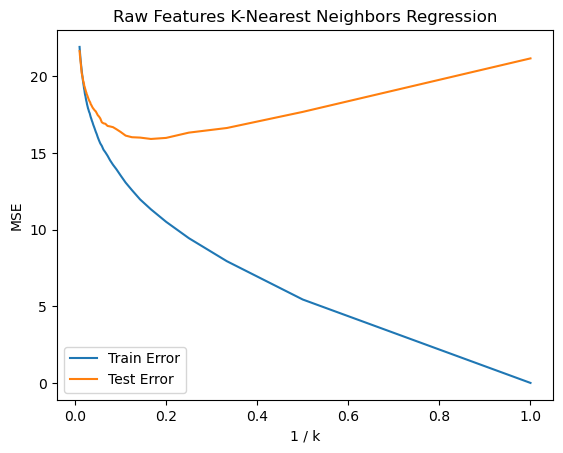

Raw Features: Best k-value for best fit: 6, test MSE: 15.920212255698747


In [261]:
k_values = list(range(1, 101))
raw_train_errors = []
raw_test_errors = []
k_inverse = []
best_k = 0
min_test_error = 100

for k in k_values:
    k_inverse.append(1.0 / k)
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_train_pred = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    if test_mse < min_test_error:
        min_test_error = test_mse
        best_k = k
    raw_train_errors.append(train_mse)
    raw_test_errors.append(test_mse)

test_error_model_dict['KNN Regression Raw Features'] = min_test_error


plt.plot(k_inverse, raw_train_errors, label='Train Error')
plt.plot(k_inverse, raw_test_errors, label='Test Error')
plt.xlabel('1 / k')
plt.ylabel('MSE')
plt.title('Raw Features K-Nearest Neighbors Regression')
plt.legend()
plt.show()

print(f"Raw Features: Best k-value for best fit: {best_k}, test MSE: {min_test_error}")

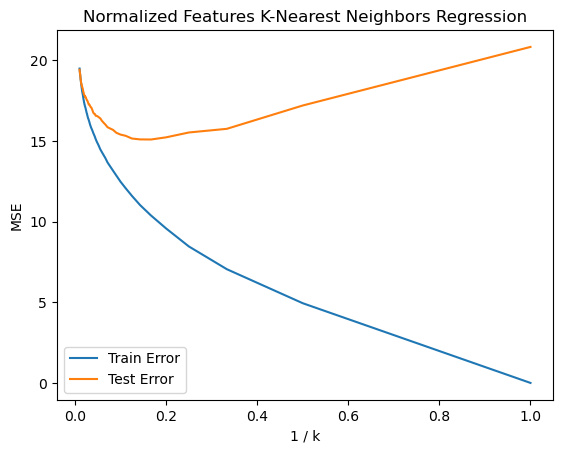

Normalized Features: Best k-value for best fit: 6, test MSE: 15.096623274894538


In [262]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.fit_transform(X_test)
norm_train_errors = []
norm_test_errors = []
best_k_norm = 0
min_test_error_norm = 100

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_norm, y_train)
    
    y_train_norm_pred = knn_model.predict(X_train_norm)
    y_test_norm_pred = knn_model.predict(X_test_norm) 

    train_mse_norm = mean_squared_error(y_train, y_train_norm_pred)
    test_mse_norm = mean_squared_error(y_test, y_test_norm_pred)
    if test_mse_norm < min_test_error_norm:
        min_test_error_norm = test_mse_norm
        best_k_norm = k
    norm_train_errors.append(train_mse_norm)
    norm_test_errors.append(test_mse_norm)

test_error_model_dict['KNN Regression Normalized Features'] = min_test_error_norm

plt.plot(k_inverse, norm_train_errors, label='Train Error')
plt.plot(k_inverse, norm_test_errors, label='Test Error')
plt.xlabel('1 / k')
plt.ylabel('MSE')
plt.title('Normalized Features K-Nearest Neighbors Regression')
plt.legend()
plt.show()

print(f"Normalized Features: Best k-value for best fit: {best_k_norm}, test MSE: {min_test_error_norm}")

(j)
Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [263]:
test_error_model_dict

{'Linear Regression without interactions': 20.681344822610523,
 'Linear Regression with interactions': 18.316901448824776,
 'KNN Regression Raw Features': 15.920212255698747,
 'KNN Regression Normalized Features': 15.096623274894538}

**Answer:**

**As we can see the K-nearest neighbors regression with normalized features gives us the lowest test error among all the models. We can also see that the K-nearest neighbors regression models perform better than the linear regression models.**


## 2. ISLR: 2.4.1

**1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a fexible statistical learning method to be better or worse than an infexible method. Justify your answer.**

**(a) The sample size n is extremely large, and the number of predictors p is small.**

**Answer:**
When the sample size is extremely large, we can expect the errors caused by variance to go down. This means that a felxible statistical learning method will have elss overfitting than an inflexible method and generally be better.

**(b) The number of predictors p is extremely large, and the number of observations n is small.**

**Answer:** This is the opposite of the first case. We would expect a flexible model to perform worse. A large number of predictors causes the model to not be flexible along with a small number of observations, some variance in the observations will have a significant impact.

**(c) The relationship between the predictors and response is highly non-linear.**

**Answer:** Flexible methods are better here, as they model non-linear relationships better than inflexible methods and can reduce bias.

**(d) The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high.**

**Answer:** High variance of the error terms can cause high noise level in our data. This would mean a flexible model which has low bias will have high variance, which can cause overfitting of the noise causing a worse performance than an inflexible model.

## 3. ISLR: 2.4.7

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

| Obs. | X1  | X2 | X3 | Y     |
|------|-----|----|----|-------|
| 1    | 0   | 3  | 0  | Red   |
| 2    | 2   | 0  | 0  | Red   |
| 3    | 0   | 1  | 3  | Red   |
| 4    | 0   | 1  | 2  | Green |
| 5    | -1  | 0  | 1  | Green |
| 6    | 1   | 1  | 1  | Red   |

Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.

**(a) Compute the Euclidean distance between each observation and the test point, $X_1 = X_2 = X_3 = 0$.**

**Answer:**

Obs. 1 $ = \sqrt{0^2 + 3^2 + 0^2} = \sqrt{9} = 3 $

Obs. 2 $ = \sqrt{2^2 + 0^2 + 0^2} = \sqrt{4} = 2 $

Obs. 3 $ = \sqrt{0^2 + 1^2 + 3^2} = \sqrt{1 + 9} = \sqrt{10} \approx 3.162  $

Obs. 4 $ = \sqrt{0^2 + 1^2 + 2^2} = \sqrt{1 + 4} = \sqrt{5} \approx 2.236 $

Obs. 5 $ = \sqrt{(-1)^2 + 0^2 + 1^2} = \sqrt{1 + 1} = \sqrt{2} \approx 1.414 $

Obs. 6 $ = \sqrt{1^2 + 1^2 + 1^2} = \sqrt{1 + 1 + 1} = \sqrt{3} \approx 1.732 $


**(b) What is our prediction with $K = 1$? Why?**

**Answer:**

For $K = 1$, we can look at the observation closest to the test point. This would be Obs. 5 $ \approx $ 1.414, so $ Y = $ Green

**(c) What is our prediction with $K = 3$?  Why?**

Since $K = 3$, we can look at the three observations closest to the test point. This would be either

 Obs. 5 $ \approx $ 1.414, so $ Y = $ Green

 Obs. 6 $ \approx $ 1.732, so $ Y = $ Red

 Obs. 2 = 2, so $ Y = $ Red

 This means that our prediction would be Red, since 2 of the nearest neighbors are red.

**(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the *best* value for $K$ to be large or small? Why?**

**Answer:**

If the Bayes decision boundary is highly nonlinear, than the best value for $K$ would be small. This is because a large $K$ has a more linear decision boundary and is inflexible. A small $K$ is more flexible, enabling it to fit more closely to nonlinear data.

## References 

Normalizing data: https://www.geeksforgeeks.org/how-to-normalize-data-using-scikit-learn-in-python/

ChatGPT
 - Query: How are StandardScaler, MinMaxScaler, and normalize from scikit-learn different? Which one is better suited to K-nearest neighbors regression?

Polynomial regression: https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features

Linear regression: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

